<h1><center> EDA on Haberman Dataset </center></h1>

<h2>Objectives</h2><br>
Classify a patient will survive breast cancer or not based on one of the 2 classes given the 3 features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [2]:
haberman = pd.read_csv('haberman.csv')
print(haberman.shape)  #how many data-points and features
print(haberman.head()) 

(306, 4)
   Age  Year operation  Axillary nodes detected  Survival status
0   30              64                        1                1
1   30              62                        3                1
2   30              65                        0                1
3   31              59                        2                1
4   31              65                        4                1


In [3]:
haberman.columns #column-names in dataset

Index([u'Age', u'Year operation', u'Axillary nodes detected',
       u'Survival status'],
      dtype='object')

In [4]:
haberman['Survival status'].value_counts() #No.of count of each classes

1    225
2     81
Name: Survival status, dtype: int64

This is an imbalanced dataset as the number of data for both classes is not equally divided

<h2>2-D Scatter plot</h2>

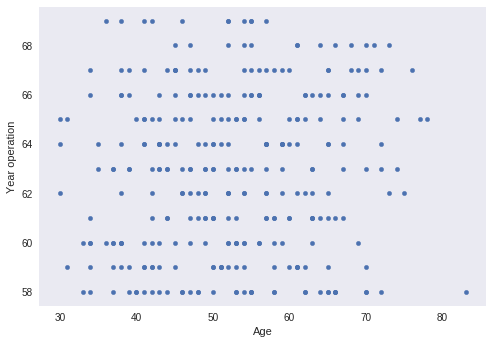

In [5]:
haberman.plot(kind='scatter', x='Age', y='Year operation')
plt.grid()
plt.show()

Not much obersevation to derive from here.

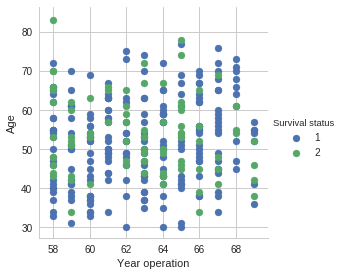

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman, hue='Survival status', size=4) \
    .map(plt.scatter, 'Year operation', 'Age') \
    .add_legend()
plt.show()

Observations:<br>
        1. We can see that as the year of operation increases, people survive more irrespective of the age. 
        2. In the initial years the number of younger people surviving was more.

<h1>3-D Scatter Plot</h1>

<h2> Pair plot</h2>

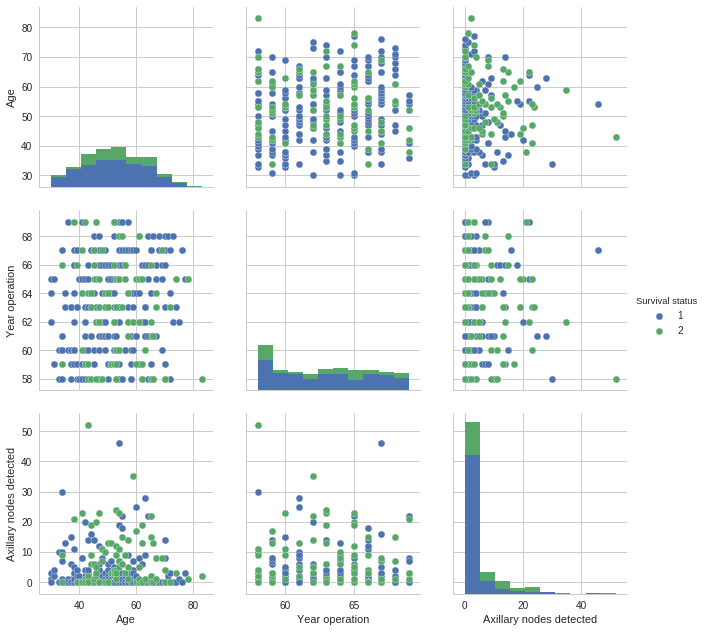

In [7]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue = 'Survival status', vars = ['Age', 'Year operation', 'Axillary nodes detected'], size=3);
plt.show()

Observations<br>
  1. The diagonal histogram shows that <br> 
             i. The number of people treated were more during initial years.
             ii. Axillary nodes detected is an important variable to determine survival status.  
            iii. People from age 40 - 70 were more likely to suffer from breast cancer.

<h2> Histogram, PDF, CDF </h2>

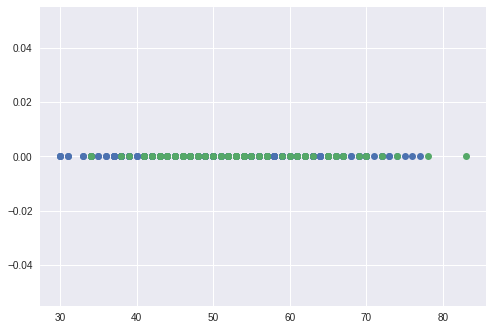

In [9]:
import numpy as np
haberman_1 = haberman.loc[haberman["Survival status"] == 1];
haberman_2 = haberman.loc[haberman["Survival status"] == 2];
# print(haberman_1["Survival status"])
plt.plot(haberman_1["Age"], np.zeros_like(haberman_1['Age']), 'o')
plt.plot(haberman_2["Age"], np.zeros_like(haberman_2['Age']), 'o')

plt.show()

Not able to derive much from 1-d scatter plot

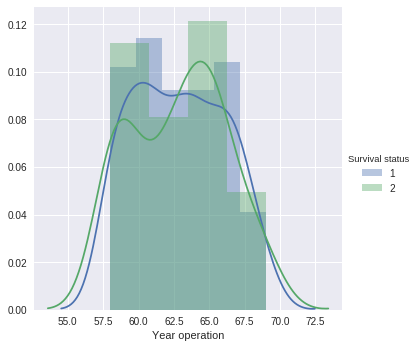

In [10]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Year operation") \
   .add_legend();
plt.show();

There is a lot of overlap in this histogram.

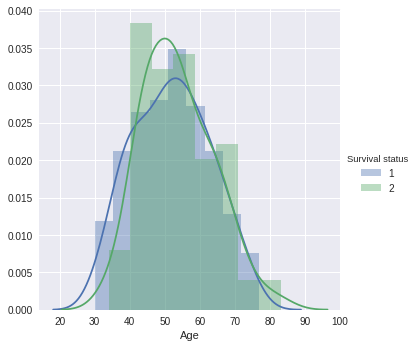

In [11]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();

This histogram shows that more people are in the range of 40-70 who suffer from cancer. <br>
The count of non-surviving people reaches peak at the age of 50.

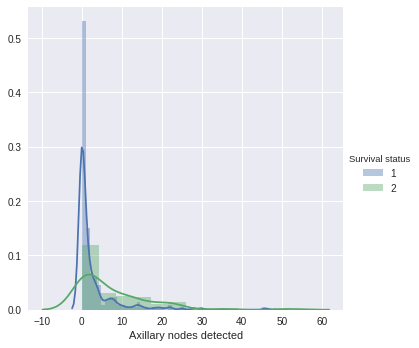

In [14]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Axillary nodes detected") \
   .add_legend();
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


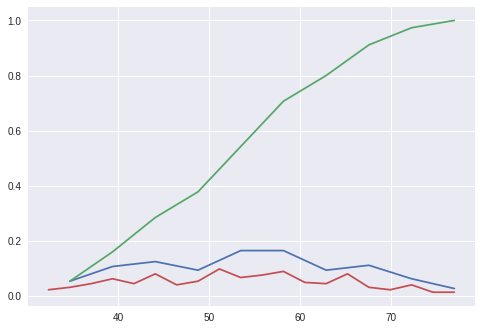

In [17]:
counts, bin_edges = np.histogram(haberman_1['Age'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(haberman_1['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

<h2>CDF</h2>

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


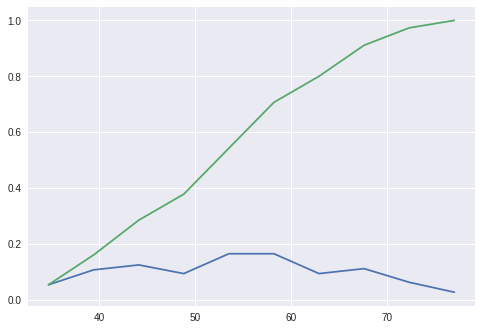

In [20]:
counts, bin_edges = np.histogram(haberman_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


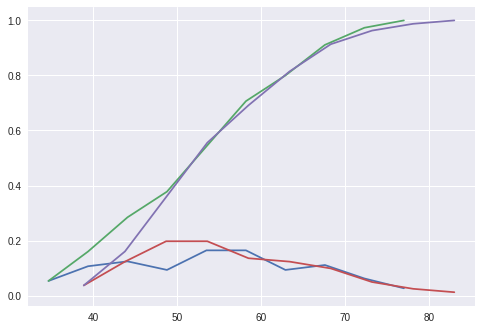

In [21]:
# Surviving status = 1
counts, bin_edges = np.histogram(haberman_1['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# Surviving status = 2
counts, bin_edges = np.histogram(haberman_2['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

<h1>Mean, Variance and Std-dev</h1>

In [27]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_1["Age"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_1["Age"],50)));
print(np.mean(haberman_2["Age"]))

print("\nStd-dev:");
print(np.std(haberman_1["Age"]))
print(np.std(haberman_2["Age"]))

Means:
52.01777777777778
52.008849557522126
53.67901234567901

Std-dev:
10.987655475100508
10.104182193031312


<h1> Median, Percentile, Quantile, IQR, MAD </h1>

In [28]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_1["Age"]))
#Median with an outlier
print(np.median(np.append(haberman_1["Age"],50)));
print(np.median(haberman_2["Age"]))


print("\nQuantiles:")
print(np.percentile(haberman_1["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["Age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["Age"],90))
print(np.percentile(haberman_2["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["Age"]))
print(robust.mad(haberman_2["Age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


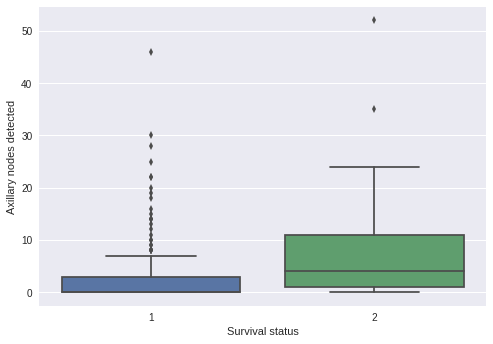

In [36]:
sns.boxplot(x='Survival status',y='Axillary nodes detected', data=haberman)
plt.show()

Observations: <br>
  Less the number of axillary nodes detected more is the possibility of surviving.

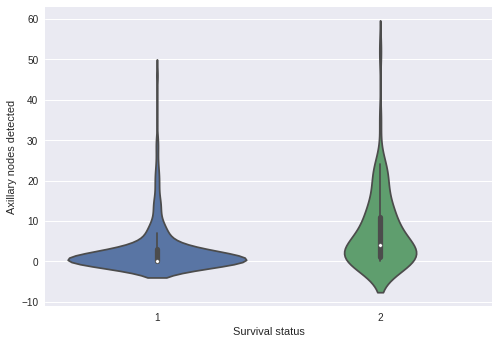

In [39]:
sns.violinplot(x="Survival status", y="Axillary nodes detected", data=haberman, size=8)
plt.show()

Observations <br>
Survivng people have mostly 0-5 nodes detected  <br>
For non-survivng people nodes are getting increased

<h1> Summarizing all the plots <h1>

1. Age is an important feature for classification as older people have less possibility to survive
2. Year of operation is also another important feature as more number of people survived in the later years.
3. Nodes detected is inversely proportional to the possibility of survivng.